In [13]:
#-*-coding:utf-8-*-
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
k=0.5
N=100
dt=0.0001
step=200
x_ini=0.0
x_end=1.0
dx=(x_end - x_ini)/N
dx2=dx**2
r=k*(dt/dx2)
def IC():
    global u
    u=np.zeros(N+1)
    u[0]=1.0
    u[N]=1.0
    #IC:三角型
    # for i in range(1,N):
    # x = x_ini + i*dx
    # if 0<x and x<=0.5:
    # u[i]=x+1
    # elif 0.5<x and x<1:
    # u[i]=-x+2
    #IC:三角関数の線形和
    x=np.linspace(x_ini,x_end,N+1)
    y=np.sin(5*np.pi*x) + np.sin(30*np.pi*x) + np.sin(80*np.pi*x) +1
    for i in range(1,N):
        u[i]=y[i]
    M=np.linspace(x_ini,x_end,N+1)
    plt.plot(M,u)
    
def evolve_mat1(): #FTCS 法による計算
    A=np.zeros((len(u),len(u)),dtype=float)
    A[0,0]=A[len(u)-1,len(u)-1]=1
    for i in range(1,len(u)-1):
        A[i,i-1]=r
        A[i,i]= 1.0 - 2*r
        A[i,i+1]=r
    return A

def evolve_mat2(): #Crank-Nicolson 法による計算
    myu=r/2
    A=np.zeros((len(u),len(u)),dtype=float)
    B=np.zeros((len(u),len(u)),dtype=float)
    A[0,0]=A[len(u)-1,len(u)-1]=1
    B[0,0]=B[len(u)-1,len(u)-1]=1
    for i in range(1,len(u)-1):
        A[i,i-1]=1
        B[i,i-1]=-1
        A[i,i]= -2-1/myu
        B[i,i]= 2-1/myu
        A[i,i+1]=1
        B[i,i+1]=-1
    C=np.dot(LA.inv(A),B)
    return C
def evolve(m,b):
    for i in range(1,step+1):
        t= i*dt
        u1=np.dot(m,b)
        if (i%100)==0 :
            A=np.linspace(x_ini,x_end,N+1)
            plt.plot(A,u1)
            b=u1[:]
        else:
            plt.legend(["t=0.00","t=0.01","t=0.02"],loc=2)
            plt.xlabel("x")
            plt.ylabel("u")
            plt.axhline(y=0, ls='-',lw=1,color='black')
            plt.title("1-D diffusion-eq")
            plt.show()

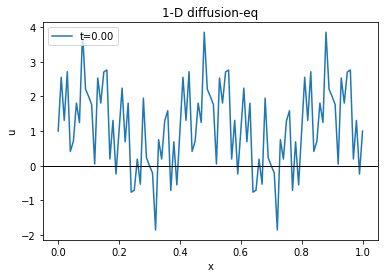

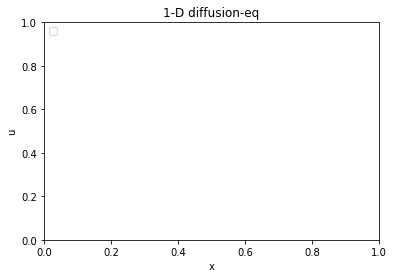

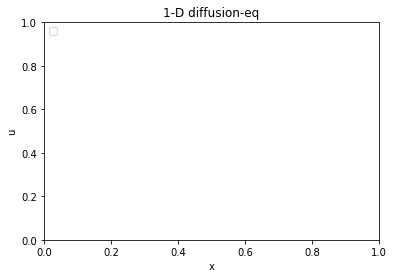

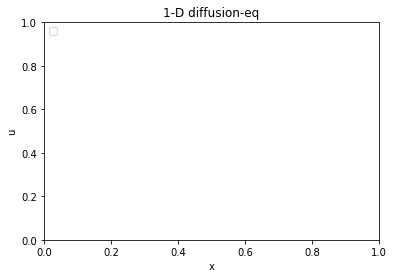

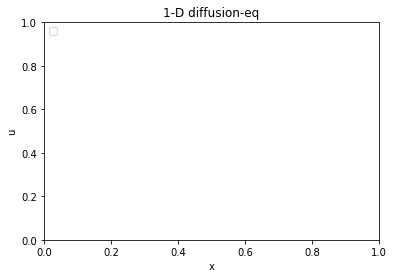

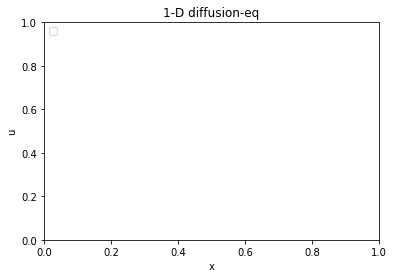

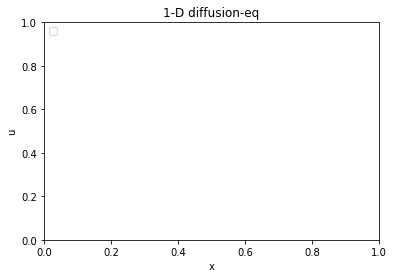

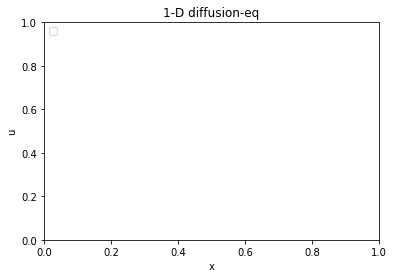

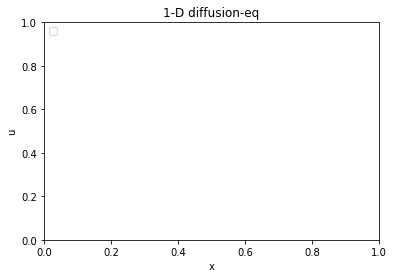

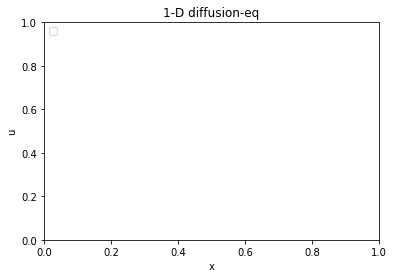

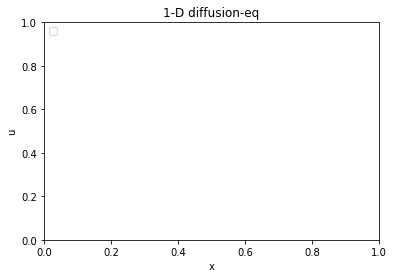

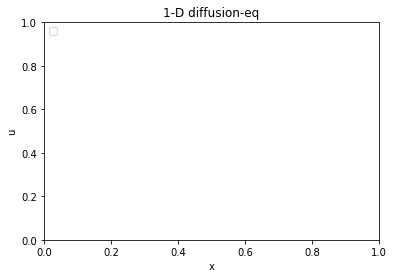

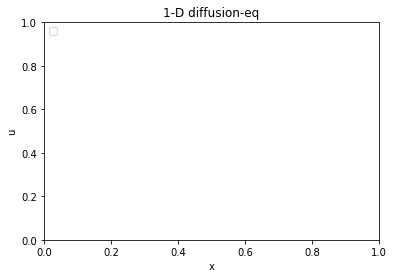

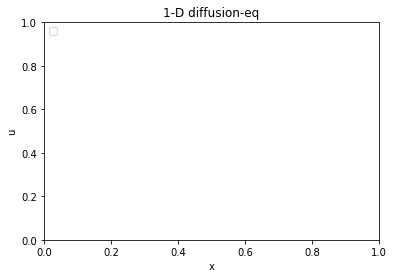

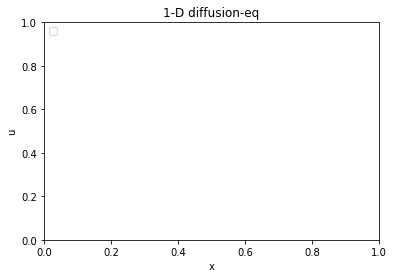

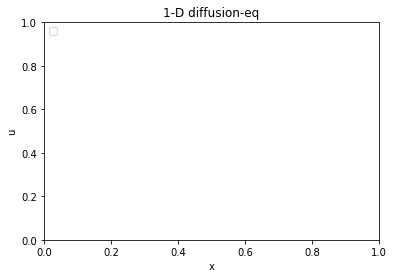

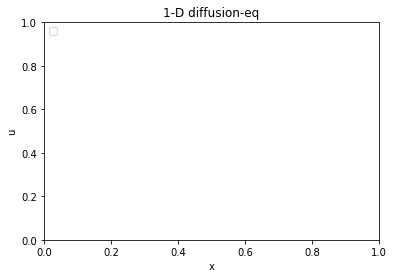

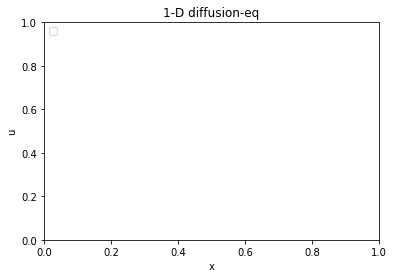

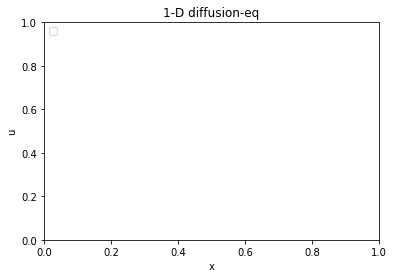

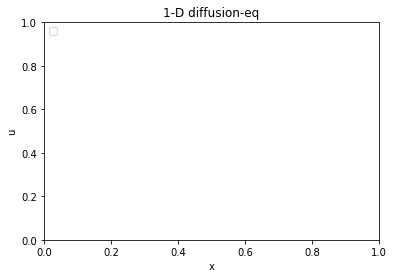

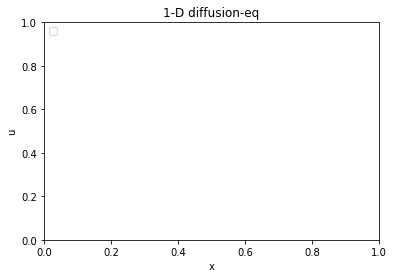

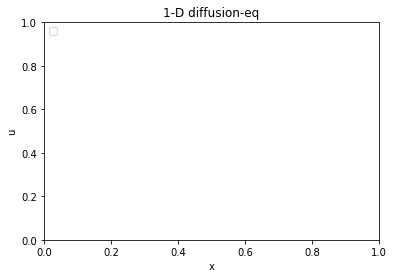

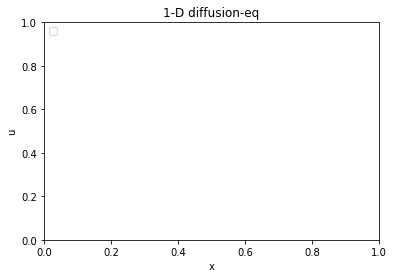

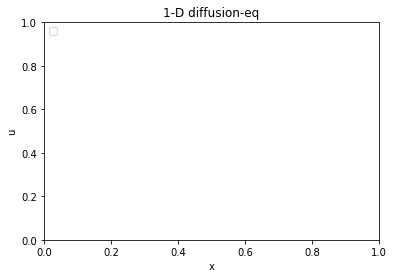

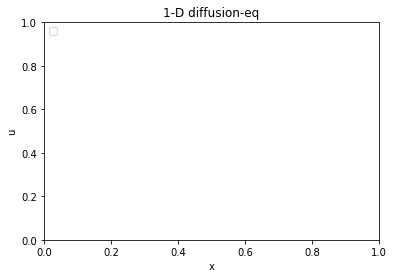

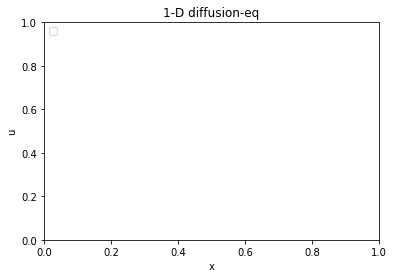

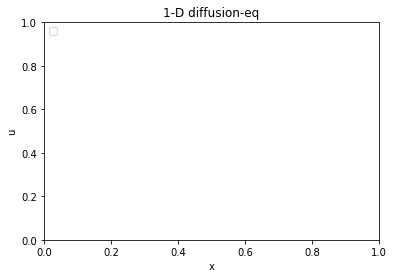

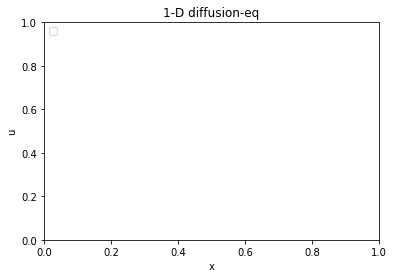

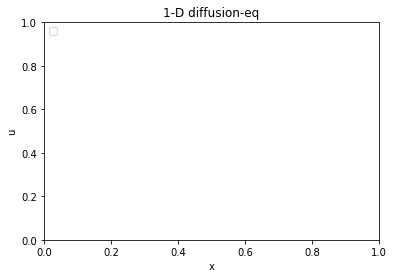

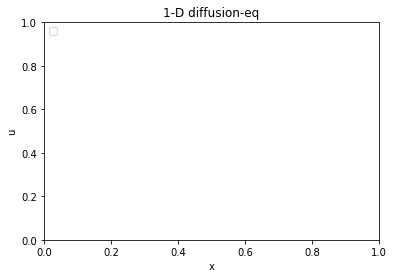

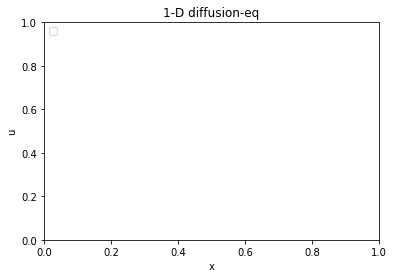

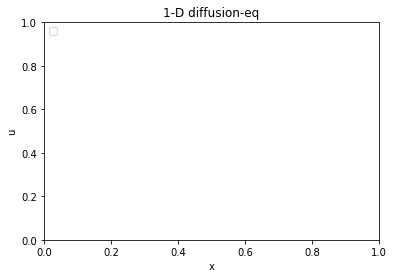

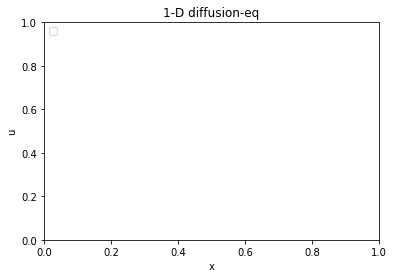

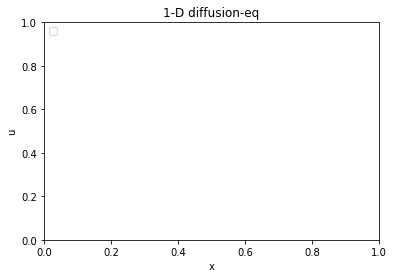

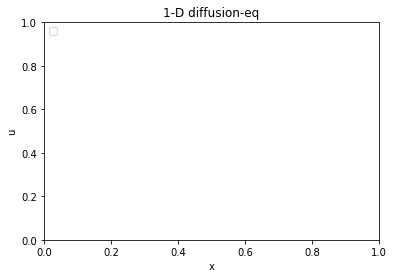

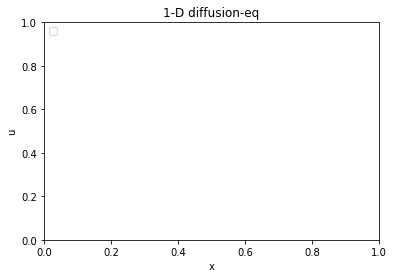

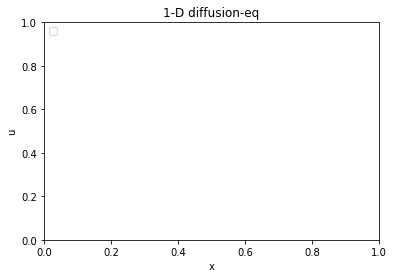

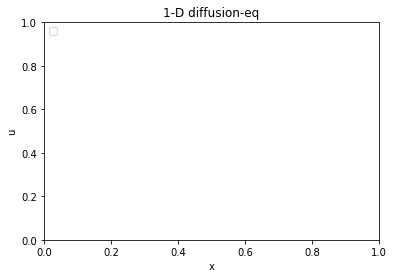

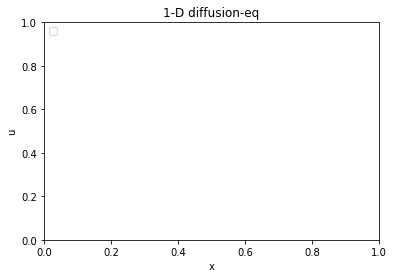

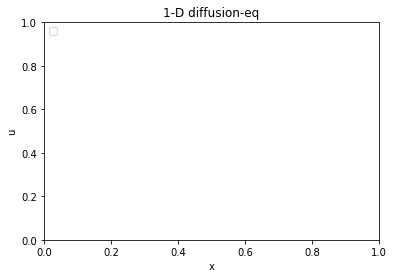

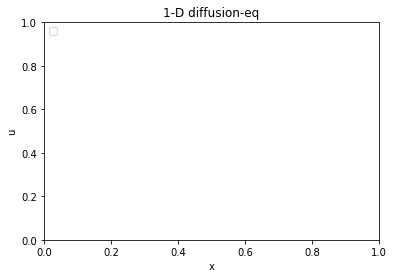

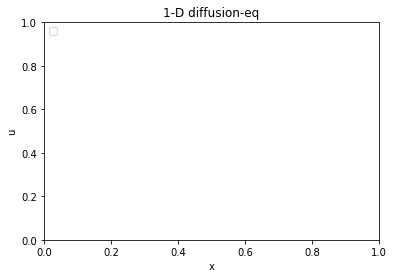

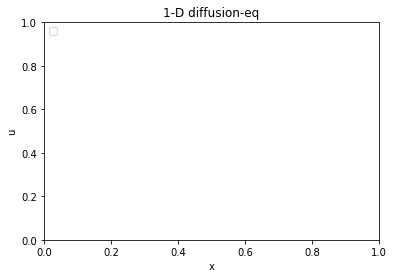

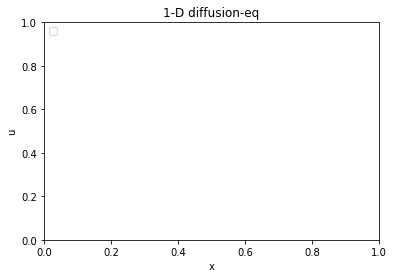

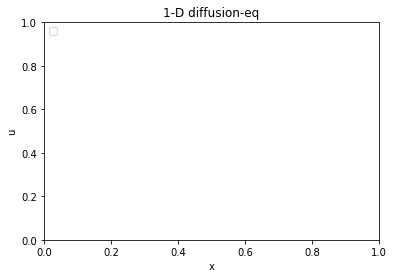

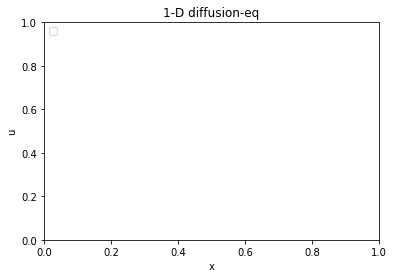

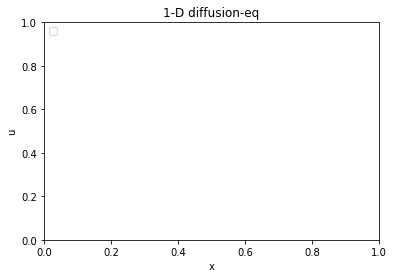

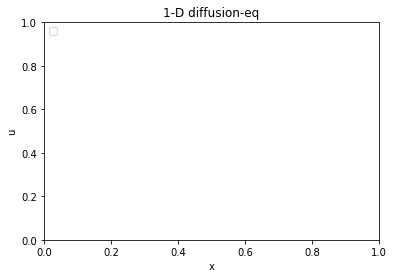

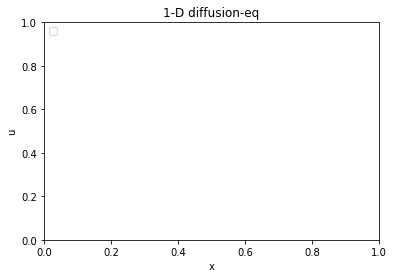

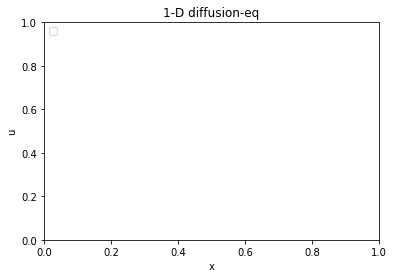

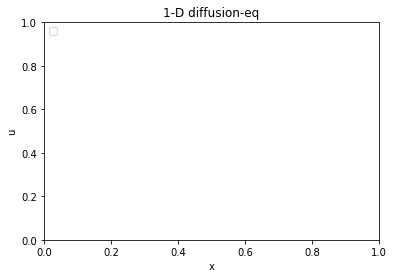

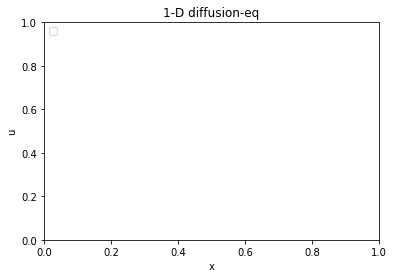

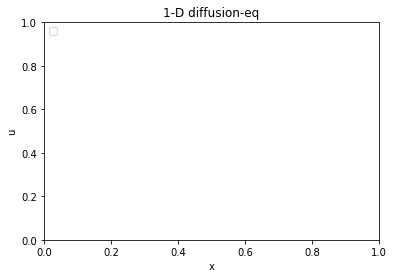

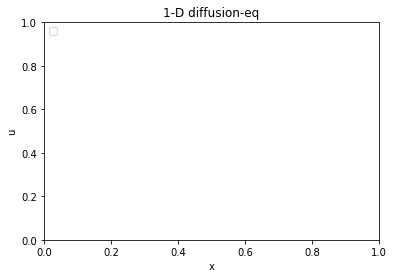

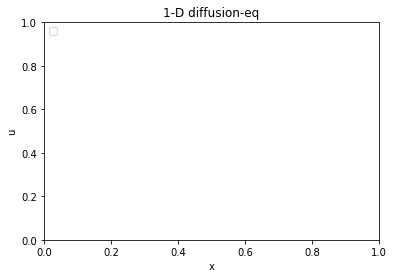

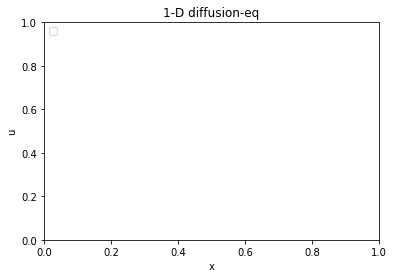

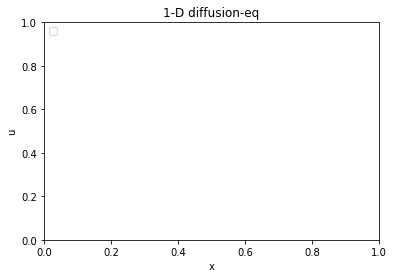

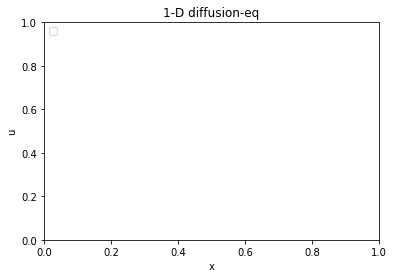

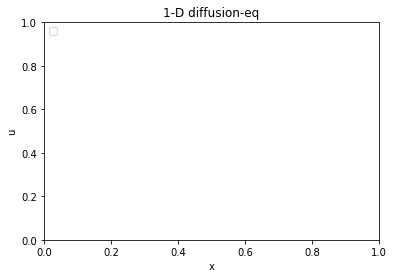

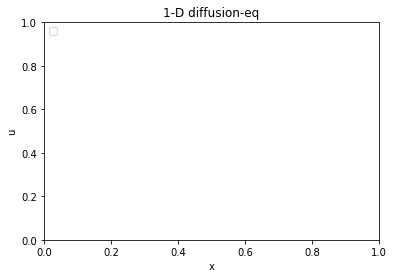

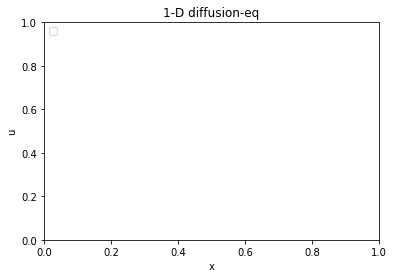

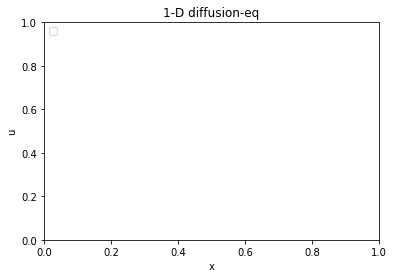

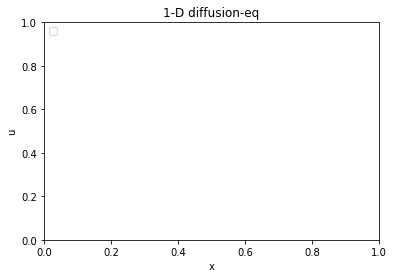

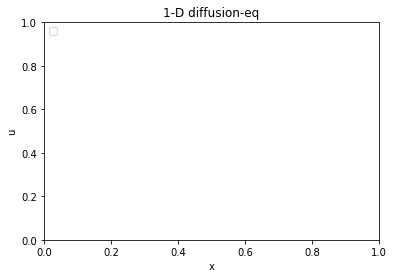

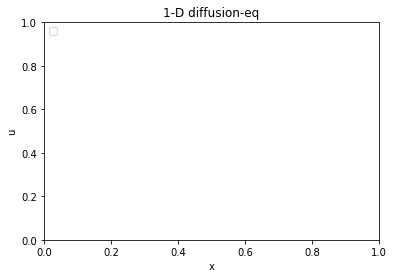

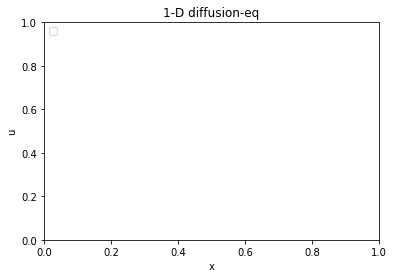

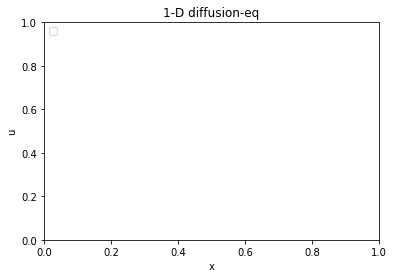

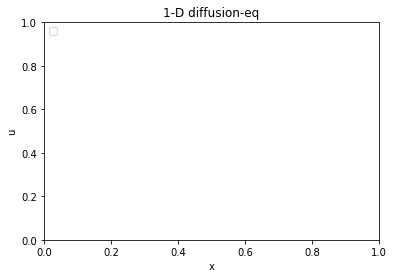

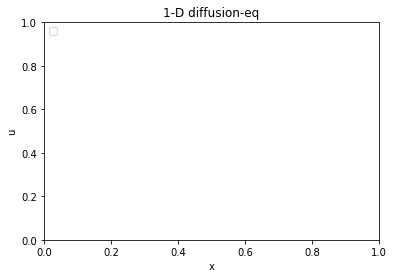

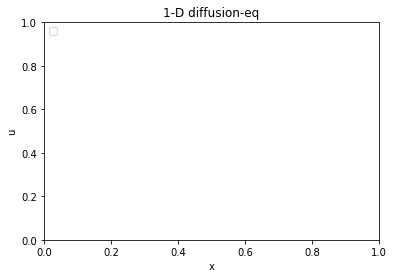

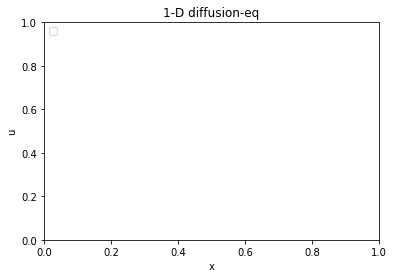

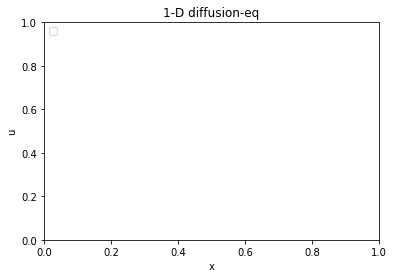

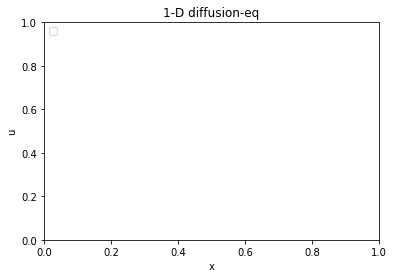

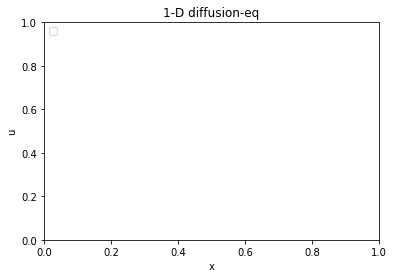

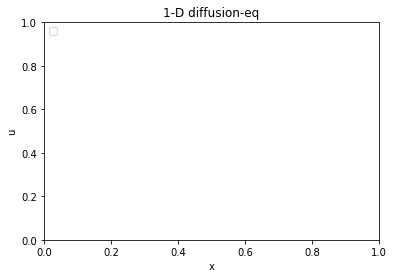

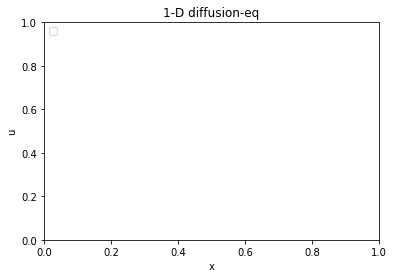

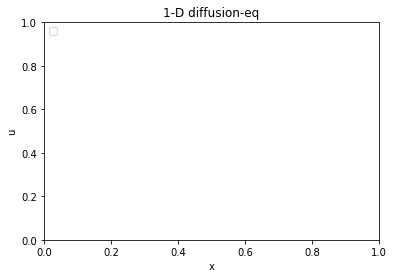

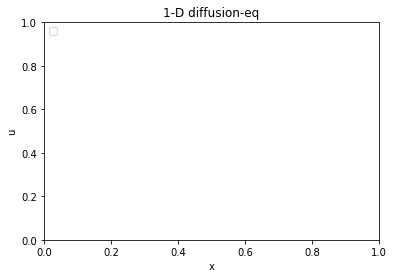

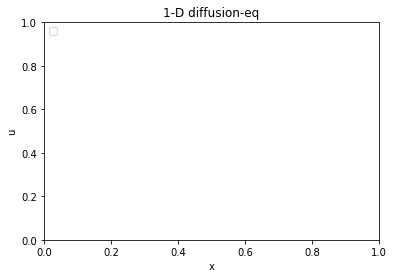

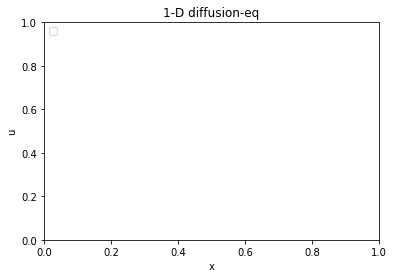

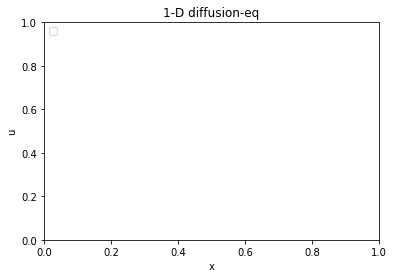

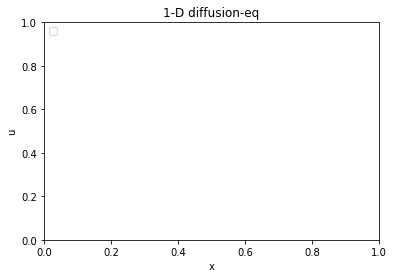

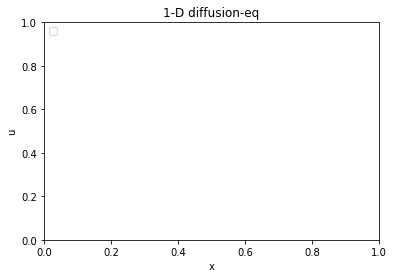

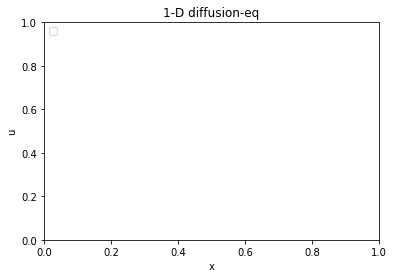

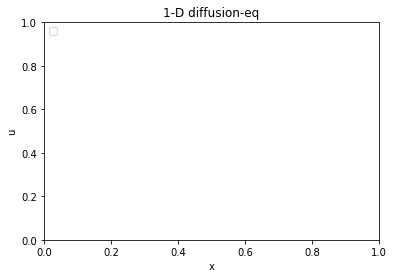

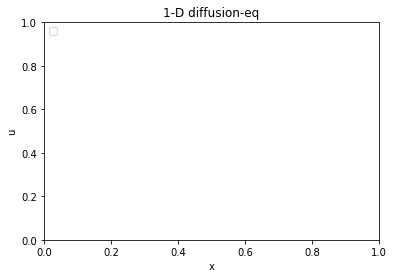

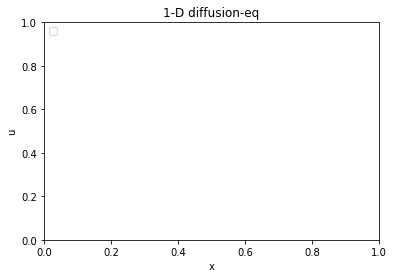

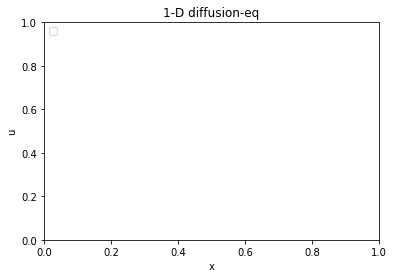

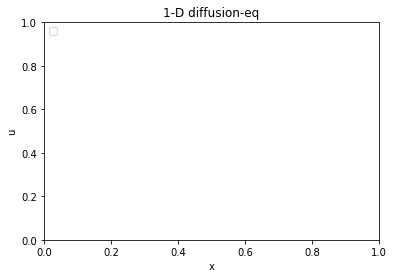

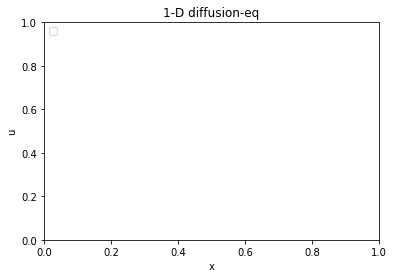

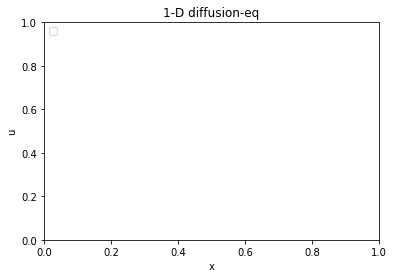

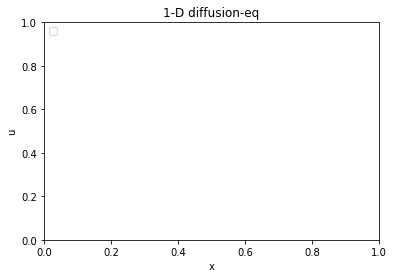

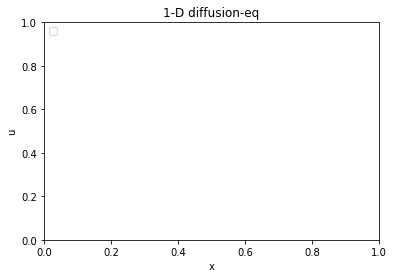

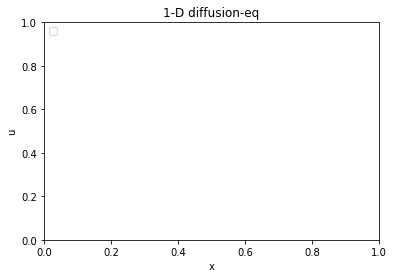

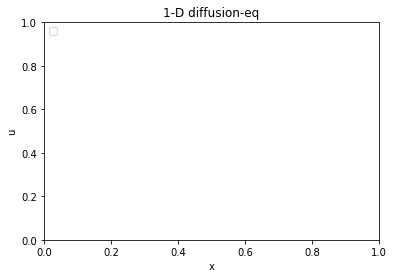

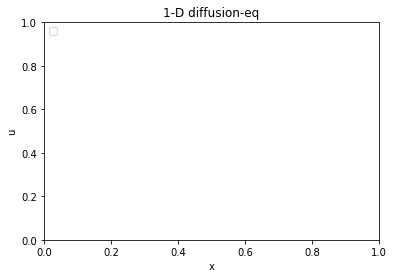

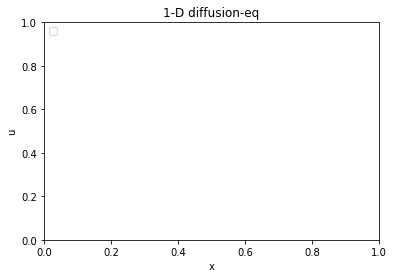

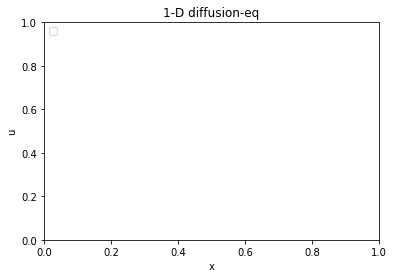

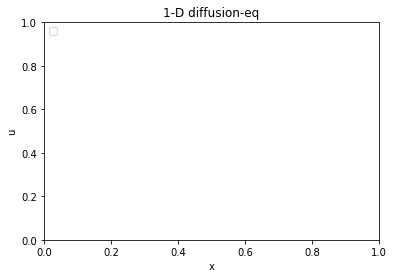

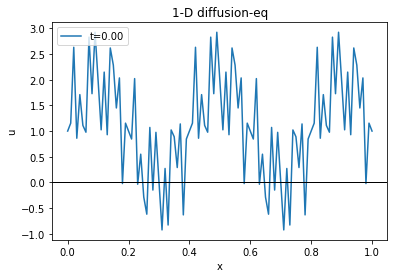

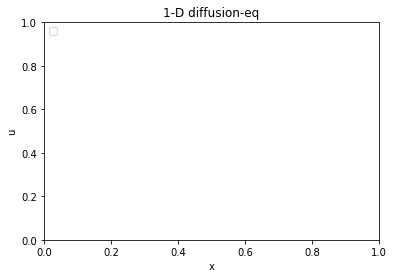

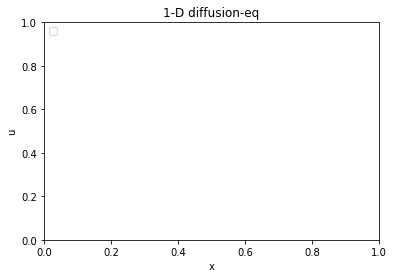

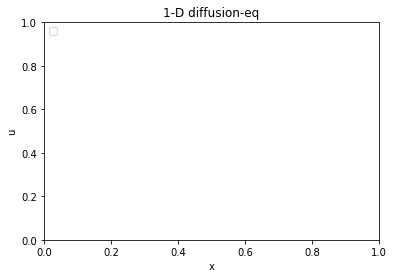

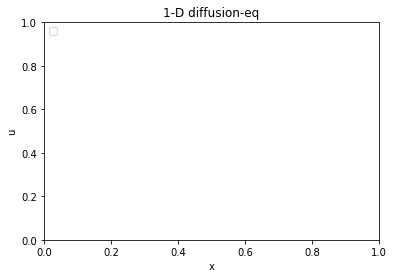

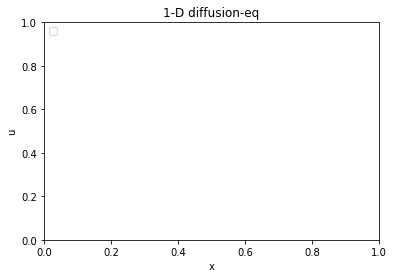

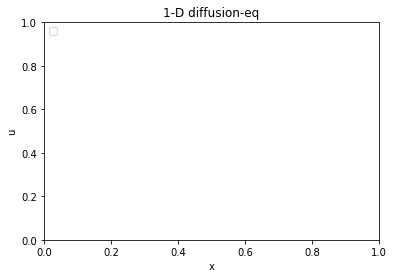

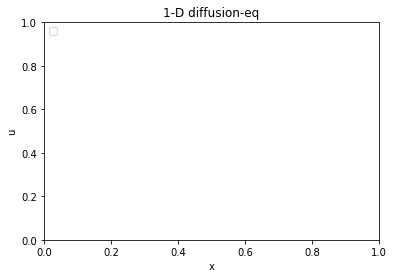

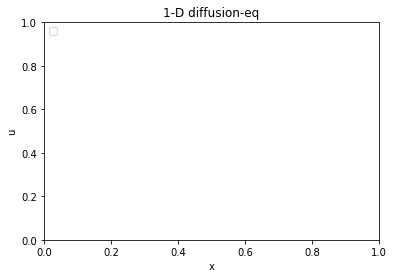

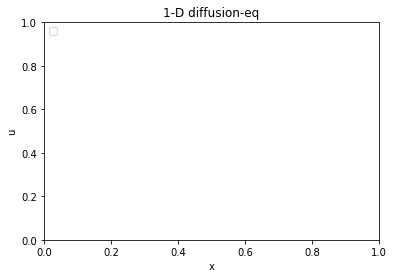

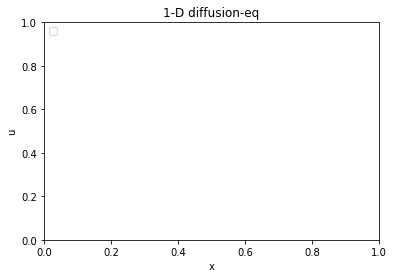

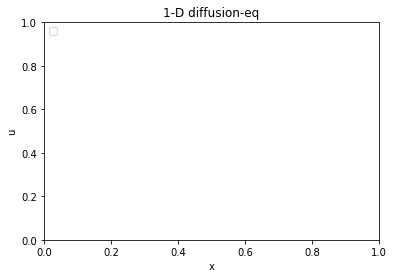

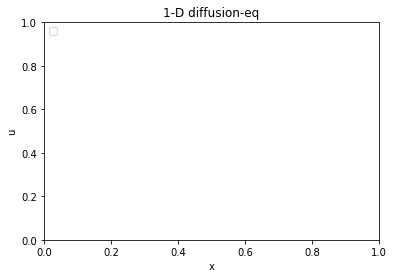

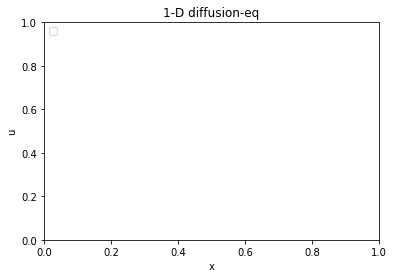

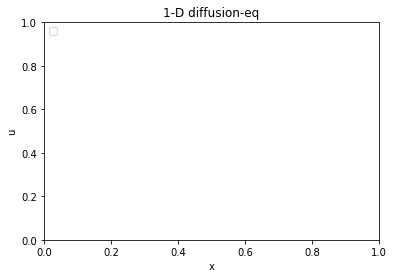

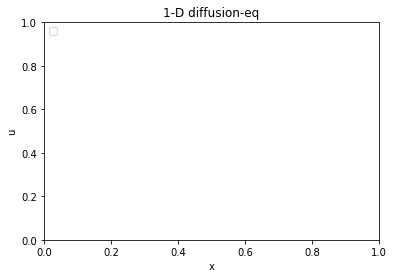

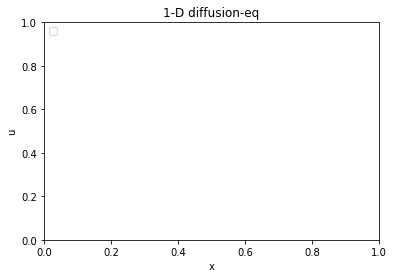

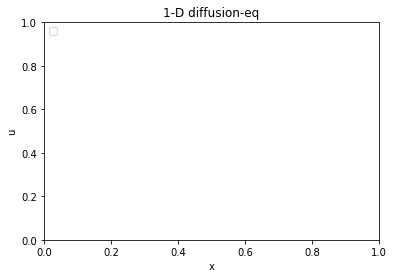

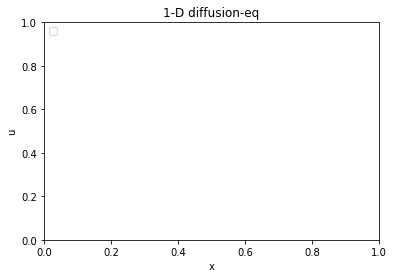

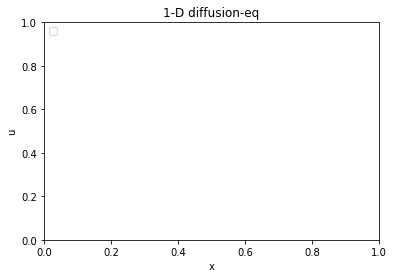

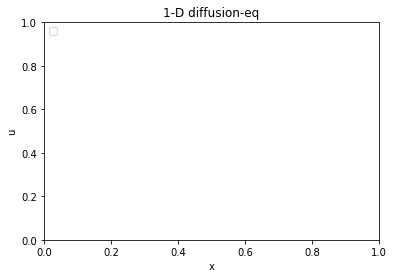

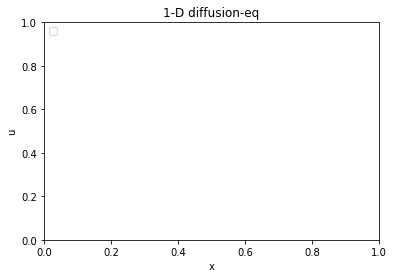

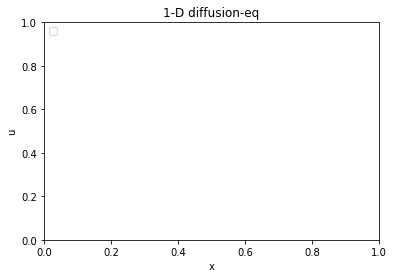

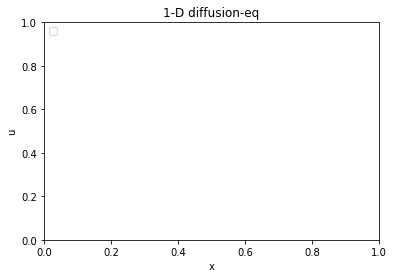

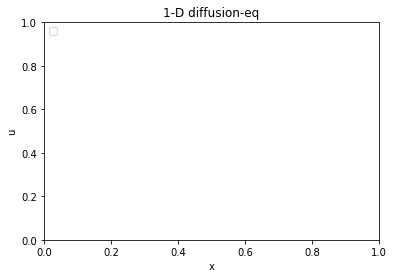

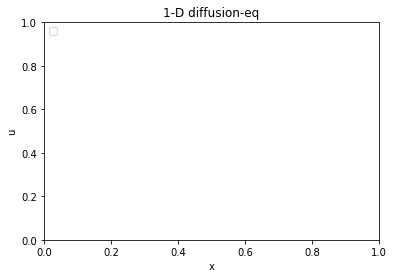

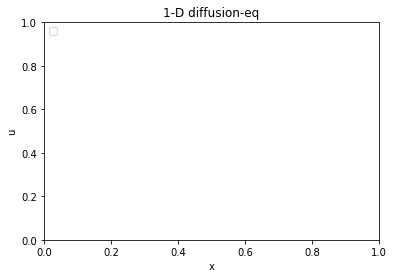

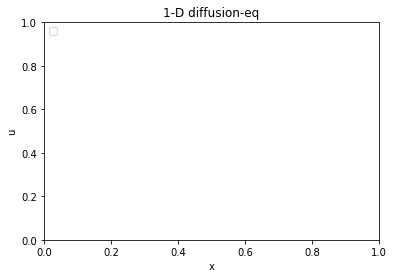

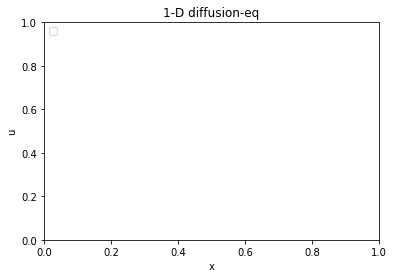

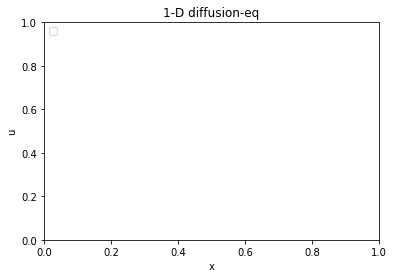

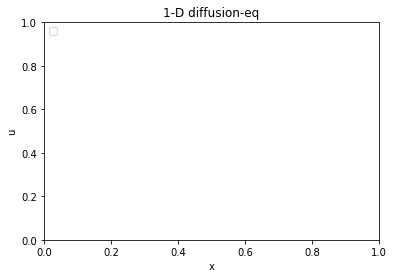

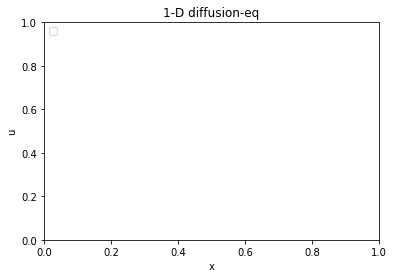

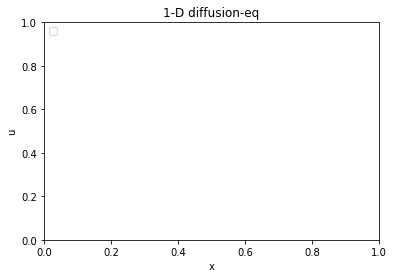

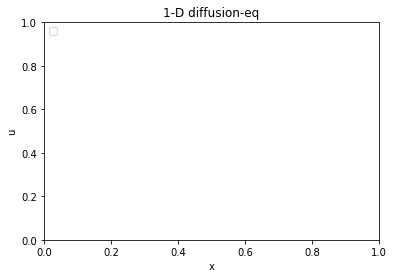

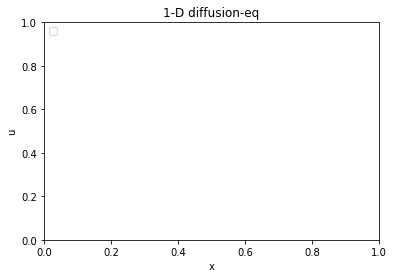

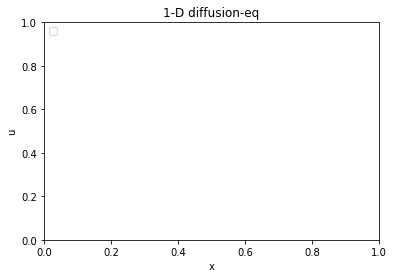

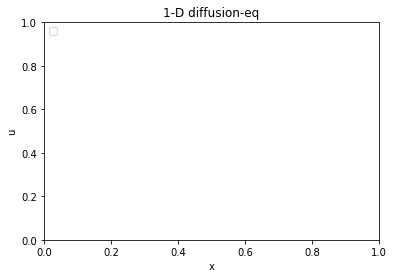

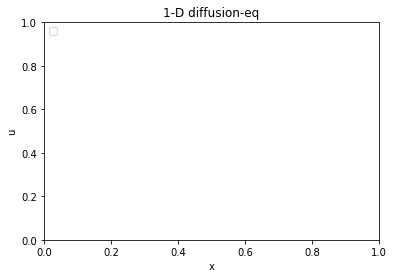

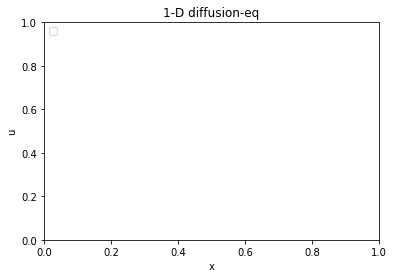

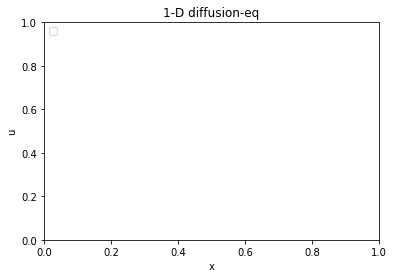

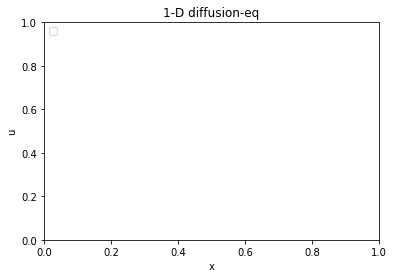

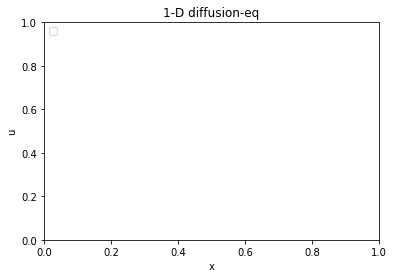

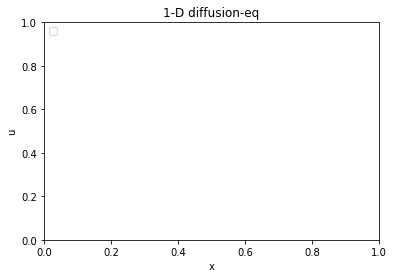

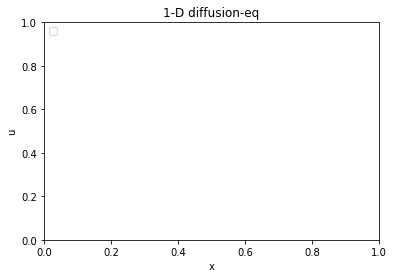

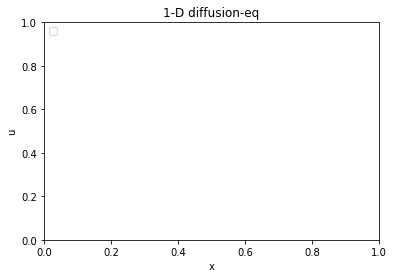

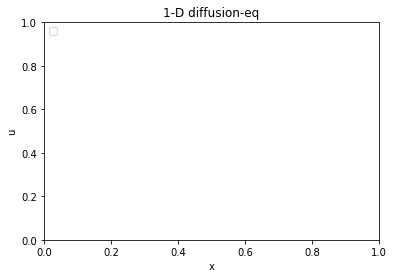

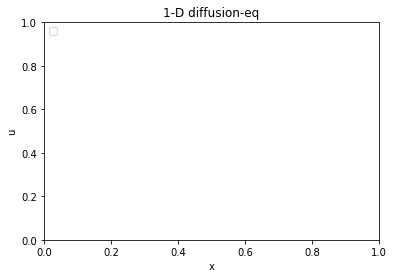

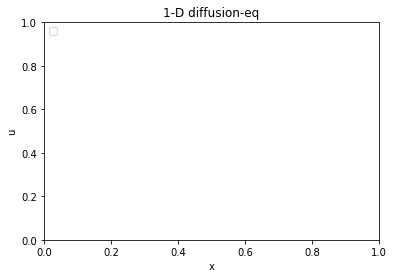

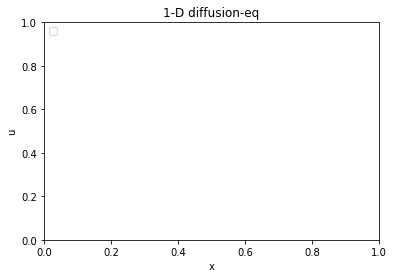

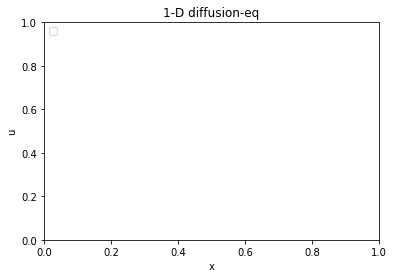

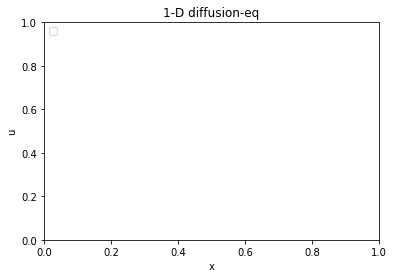

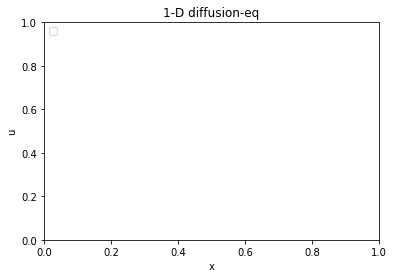

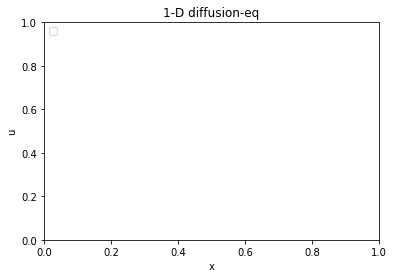

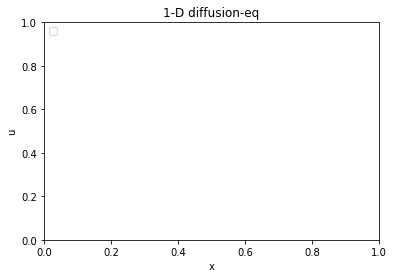

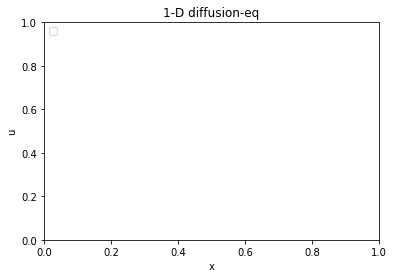

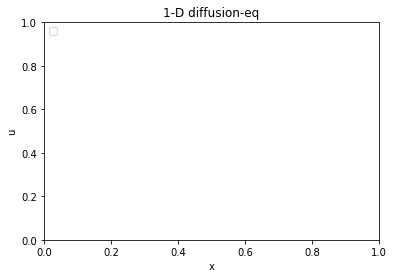

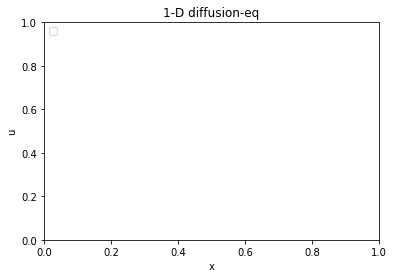

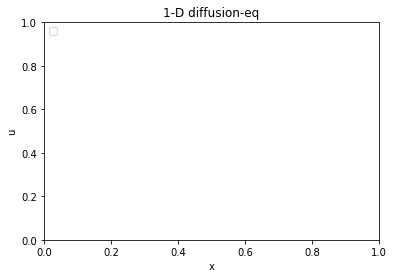

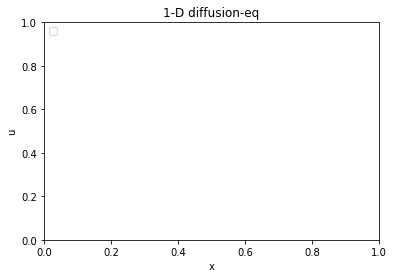

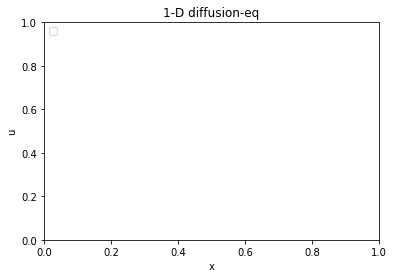

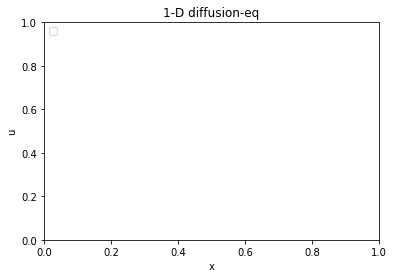

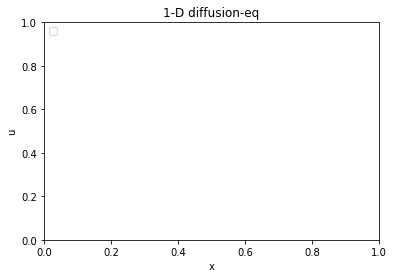

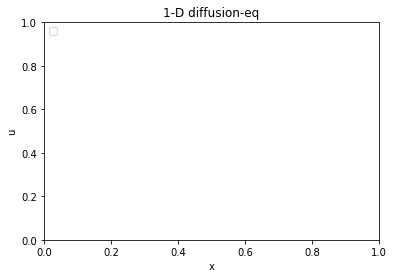

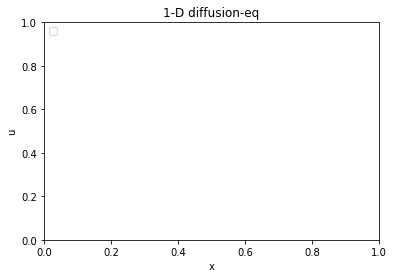

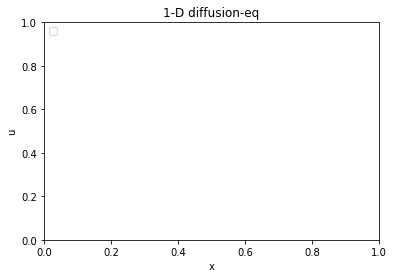

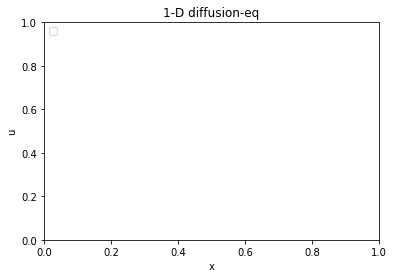

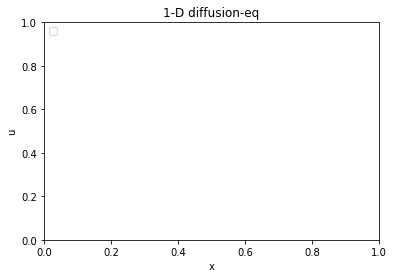

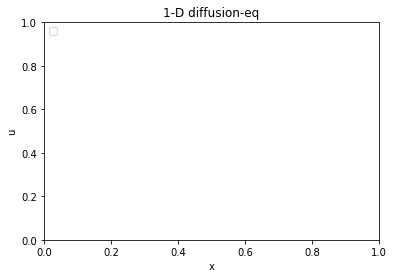

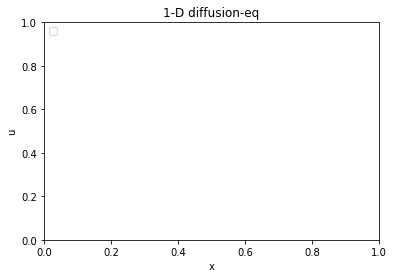

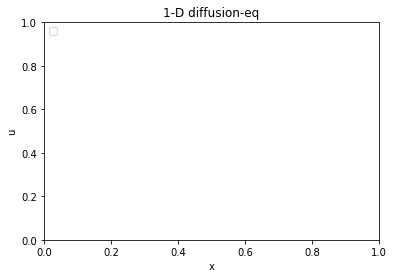

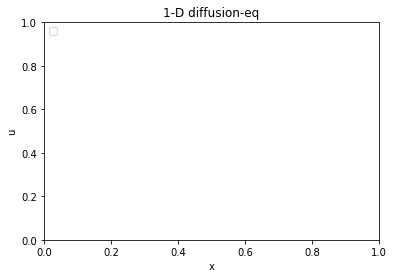

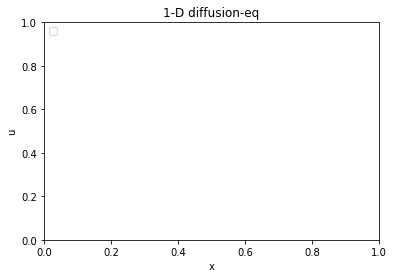

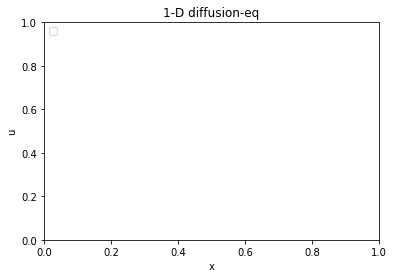

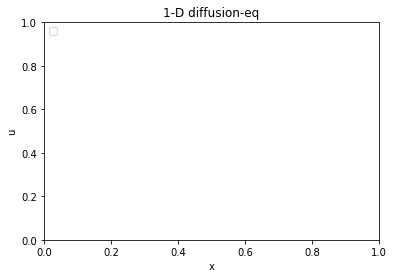

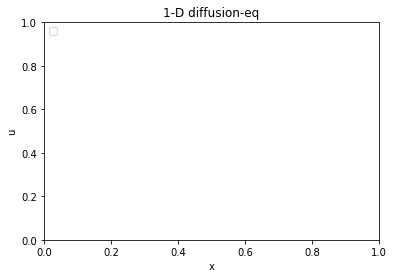

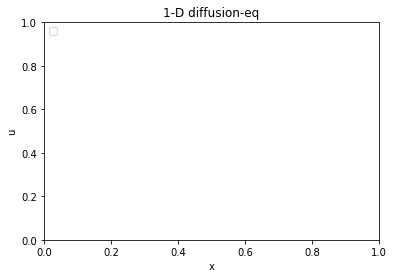

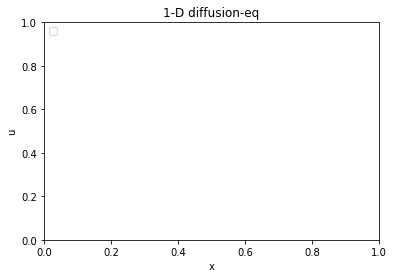

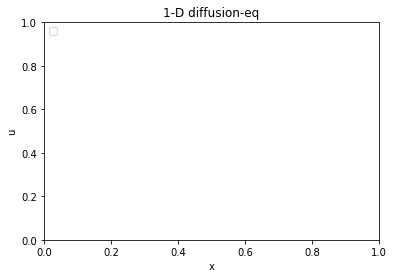

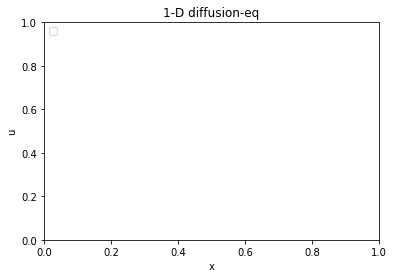

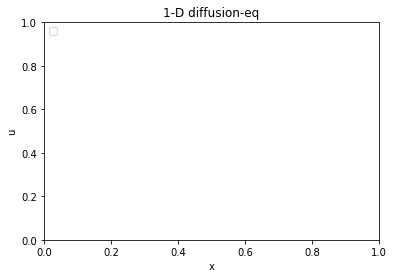

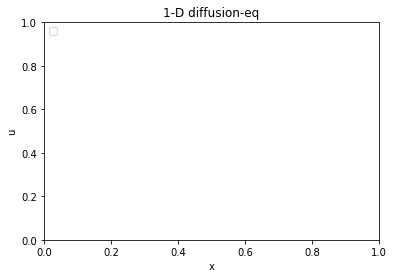

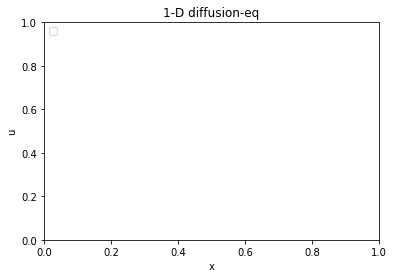

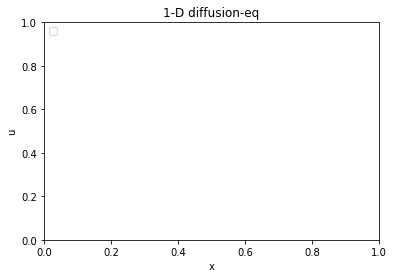

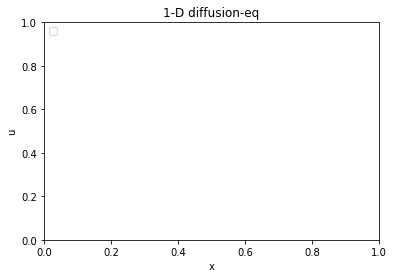

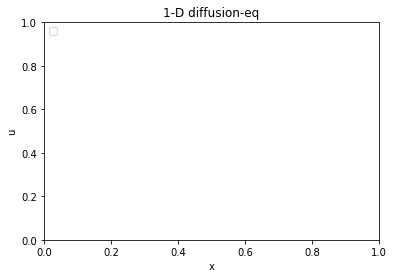

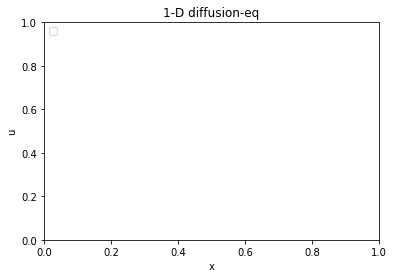

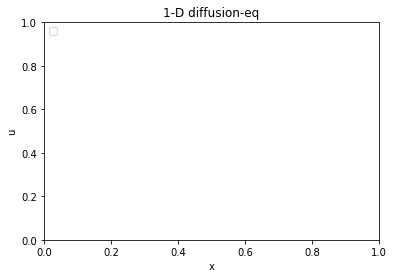

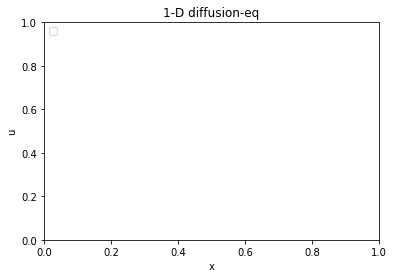

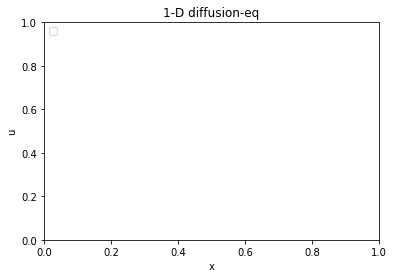

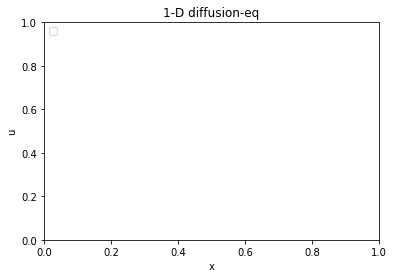

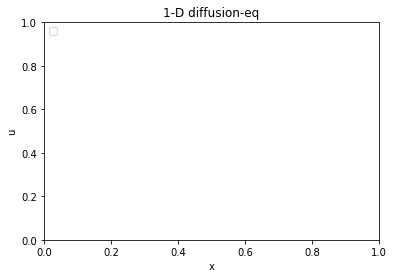

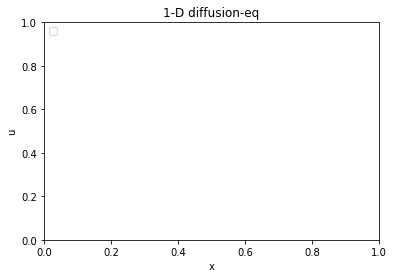

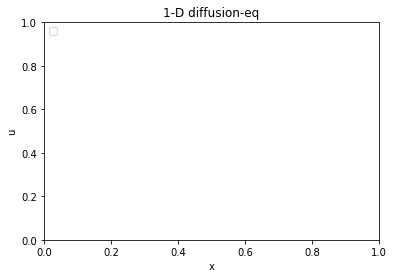

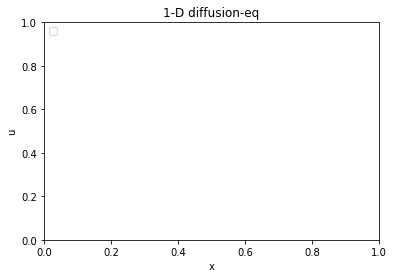

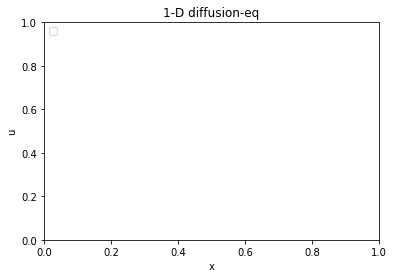

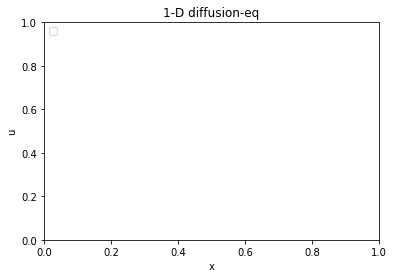

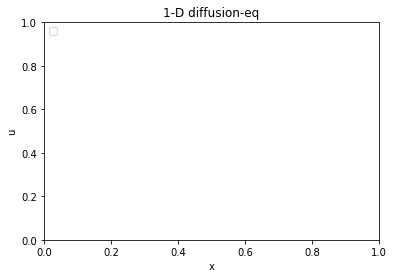

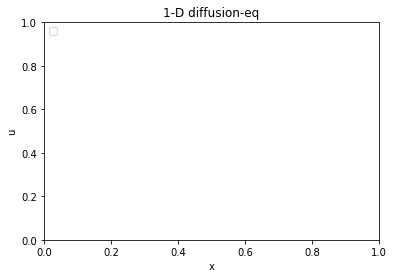

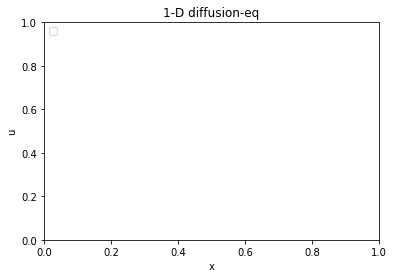

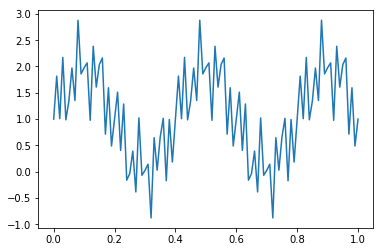

In [14]:
def main():
    IC()
    Mat=evolve_mat1()
    # Mat=evolve_mat2()
    evolve(Mat,u)
if __name__ == "__main__":
    main()
